<a href="https://colab.research.google.com/github/KanoknatKr/python_dataviz2024/blob/main/Data_Viz_2024_Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Viz 2024 Exam 2**

# ให้สืบหาฆาตรกรในคดีฆาตรกรรม (murder) ที่เกิดขึ้นในวันที่ 15 มกราคม 2018 ที่เมือง SQL City โดยเริ่มจากการตรวจสอบ ข้อมูลคดี (crime_scene_report.csv)


## นำเข้าข้อมูลทั้งหมด

In [71]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os

# ทำการนำเข้าไฟล์ทั้งหมดจาก Drive
crime_scene_report_df = pd.read_csv('/content/drive/MyDrive/Exam_2/crime_scene_report.csv')
person_df = pd.read_csv('/content/drive/MyDrive/Exam_2/person.csv')
interview_df = pd.read_csv('/content/drive/MyDrive/Exam_2/interview.csv')
income_df = pd.read_csv('/content/drive/MyDrive/Exam_2/income.csv')
get_fit_now_member_df = pd.read_csv('/content/drive/MyDrive/Exam_2/get_fit_now_member.csv')
get_fit_now_check_in_df = pd.read_csv('/content/drive/MyDrive/Exam_2/get_fit_now_check_in.csv')
facebook_event_checkin_df = pd.read_csv('/content/drive/MyDrive/Exam_2/facebook_event_checkin.csv')
driver_license_df = pd.read_csv('/content/drive/MyDrive/Exam_2/drivers_license.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## สืบหาพยานในคดี
เราจะทำการ Filter เพื่อสืบหาพยานในคดี murder ที่เกิดขึ้นในวันที่ 15 มกราคม 2018 ที่เมือง SQL City

In [72]:
filtered_data = crime_scene_report_df[(crime_scene_report_df.type == 'murder') &
                                      (crime_scene_report_df.date == 20180115) &
                                      (crime_scene_report_df.city == 'SQL City')]
filtered_data
# ได้ข้อมูลว่า : ภาพจากกล้องวงจรปิดแสดงให้เห็นว่ามีพยาน 2 คน พยานคนแรกอาศัยอยู่ที่บ้านหลังสุดท้ายบนถนน "Northwestern Dr" ส่วนพยานคนที่สองชื่อแอนนาเบลอาศัยอยู่ที่ไหนสักแห่งบนถนน "Franklin Ave"

,date,type,description,city
1227,20180115,murder,Security footage shows that there were 2 witne...,SQL City


## เช็คประวัติและคำให้การของพยานคนที่ 1

In [73]:
# พยานคนที่ 1 อาศัยอยู่ที่บ้านหลังสุดท้ายบนถนน Northwestern Dr
filtered_data = person_df[person_df.address_street_name == 'Northwestern Dr'].sort_values('address_number', ascending=False).iloc[0]
filtered_data

,499
id,14887
name,Morty Schapiro
license_id,118009
address_number,4919
address_street_name,Northwestern Dr
ssn,111564949


In [74]:
# มาดูคำให้การใน interview จากไอดี 14887
interview_df[interview_df.person_id == 14887]

# ได้ข้อมูลว่า : ฉันได้ยินเสียงปืนดังขึ้นและเห็นชายคนหนึ่งวิ่งออกมา เขาถือกระเป๋า "Get Fit Now Gym" หมายเลขสมาชิกบนกระเป๋าเริ่มต้นด้วย "48Z" เฉพาะสมาชิก gold เท่านั้นที่มีกระเป๋าแบบนั้น ชายคนนั้นขึ้นรถที่มีป้ายทะเบียน "H42W"

,person_id,transcript
4988,14887,I heard a gunshot and then saw a man run out. ...


## เช็คประวัติและคำให้การของพยานคนที่ 2

In [75]:
# พยานคนที่ 2 ชื่อ Annabel อาศัยอยู่ที่ไหนซักแห่งบนถนน Franklin Ave
filtered_data = person_df[person_df['name'].str.contains("Annabel") &
                          (person_df.address_street_name == 'Franklin Ave')]
filtered_data

,id,name,license_id,address_number,address_street_name,ssn
665,16371,Annabel Miller,490173,103,Franklin Ave,318771143


In [76]:
# มาดูคำให้การใน interview จากไอดี 16371
interview_df[interview_df.person_id == 16371]
# ได้ข้อมูลว่า : ฉันได้เห็นการฆาตกรรมเกิดขึ้น และฉันจำฆาตกรได้จากโรงยิมของฉัน ขณะที่ฉันกำลังออกกำลังกายเมื่อสัปดาห์ที่แล้วในวันที่ 9 มกราคม

,person_id,transcript
4989,16371,"I saw the murder happen, and I recognized the ..."


## เริ่มสืบหาผู้ต้องสงสัยจากคำให้การพยานทั้งสองคน
หลังจากได้ข้อมูลฆาตกรแล้วเราจะมาเริ่มสืบหาผู้ต้องสงสัยจากคำให้การพยานทั้งสองคน

In [77]:
# จากคำให้การของพยานคนที่ 1 เริ่มสืบหาบุคคลจาก get_fit_now_member ที่มี id ขึ้นต้นด้วย 48Z และอยู่ระดับ gold
filtered_data = get_fit_now_member_df[get_fit_now_member_df['id'].str.contains("48Z") &
                                      (get_fit_now_member_df.membership_status == 'gold')]
filtered_data

,id,person_id,name,membership_start_date,membership_status
181,48Z7A,28819,Joe Germuska,20160305,gold
182,48Z55,67318,Jeremy Bowers,20160101,gold


In [78]:
# ข้อมูลของผู้ต้องสงสัยคนที่ 1 Joe Germuska
filtered_data = person_df[person_df.id == 28819]
filtered_data

,id,name,license_id,address_number,address_street_name,ssn
2037,28819,Joe Germuska,173289,111,Fisk Rd,138909730


In [79]:
# ข้อมูลของผู้ต้องสงสัยคนที่ 2 Jeremy Bowers
filtered_data = person_df[person_df.id == 67318]
filtered_data

,id,name,license_id,address_number,address_street_name,ssn
6327,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


In [80]:
# จากคำให้การของพยานคนที่ 1 เริ่มสืบหาบุคคลที่มีป้ายทะเบียนรถ H42W
filtered_data = driver_license_df[driver_license_df['plate_number'].str.contains('H42W') &
                                  (driver_license_df.gender == 'male')]
filtered_data

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
3529,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
6240,664760,21,71,black,black,male,4H42WR,Nissan,Altima


In [81]:
# เช็คเลขป้ายทะเบียนรถของผู้ต้องสงสัยว่าตรงกับบุคคลไหนหรือไม่
person_df[person_df.license_id == 423327]

,id,name,license_id,address_number,address_street_name,ssn
6327,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


#  Jeremy Bowers ตกเป็นผู้ต้องสงสัยในคดีนี้มากที่สุด
พบว่าจากคำให้การของพยานคนที่ 1 นั้นทำให้บุคคลนี้ตกเป็นผู้ต้องสงสัยมากที่สุดจากทั้งเลข id สมาชิก gold และ ทะเบียนรถ H24W


In [82]:
# เราจะมาดูคำให้การของผู้ต้องหา Jeremy Bowers จาก interview
interview_df[interview_df.person_id == 67318]
# ได้ข้อมูลว่า : ฉันถูกจ้างโดยผู้หญิงคนหนึ่งที่มีเงินมากมาย ฉันไม่ทราบชื่อของเธอ แต่ฉันรู้ว่าเธอสูงประมาณ 5 ฟุต 5 นิ้ว (65 นิ้ว) หรือ 5 ฟุต 7 นิ้ว (67 นิ้ว) เธอมีผมสีแดงและขับรถ Tesla Model S ฉันรู้ว่าเธอไปชมคอนเสิร์ต SQL Symphony 3 ครั้งในเดือนธันวาคม 2017

,person_id,transcript
4990,67318,I was hired by a woman with a lot of money. I ...


## Jeremy Bowers คือฆาตกรที่ถูกว่าจ้างมา
จากคำสารภาพของเขาทำให้เรามีข้อมูลพอทีจะสืบค้นหาผู้ต้องสงสัยที่ว่าจ้างมาได้ "ผู้หญิงที่มีผมสีแดงและขับรถ Tesla Model S"

In [83]:
#เราจะมาตรวจสอบว่าบุคคลใดบ้างที่มีลักษณะตรงกับคำสารภาพของฆาตกรที่ให้คำสารภาพมา
filtered_data = driver_license_df[(driver_license_df.gender == 'female') &
                                  (driver_license_df.hair_color == 'red') &
                                  (driver_license_df.car_make == 'Tesla') &
                                  (driver_license_df.car_model == 'Model S')]
filtered_data

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
1105,202298,68,66,green,red,female,500123,Tesla,Model S
2054,291182,65,66,blue,red,female,08CM64,Tesla,Model S
9078,918773,48,65,black,red,female,917UU3,Tesla,Model S


# เริ่มสืบหาผู้ที่ตกเป็นผู้ต้องสงสัยในการว่าจ้างฆาตกรรม
จากการคำสารภาพของฆาตกรพบว่าลักษณะตามคำให้การมีผู้ที่ตกเป็นผู้ต้องสงสัยทั้งหมด 3 คน

In [84]:
# สืบค้นประวัติของผู้ต้องสงสัยคนที่ 1 id 202298
filtered_data = person_df[person_df.license_id == 202298]
filtered_data

,id,name,license_id,address_number,address_street_name,ssn
9985,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


In [85]:
# ตรวจสอบผู้ต้องสงสัยคนที่ 1 ที่เข้าชมคอนเสิร์ต SQL Symphony 3 ครั้งในเดือนธันวาคม 2017 จาก id 99716
facebook_event_checkin_df[facebook_event_checkin_df.person_id == 99716]

,person_id,event_id,event_name,date
20006,99716,1143,SQL Symphony Concert,20171206
20007,99716,1143,SQL Symphony Concert,20171212
20008,99716,1143,SQL Symphony Concert,20171229


In [86]:
# สืบค้นประวัติของผู้ต้องสงสัยคนที่ 2 id 291182
filtered_data = person_df[person_df.license_id == 291182]
filtered_data

,id,name,license_id,address_number,address_street_name,ssn
8977,90700,Regina George,291182,332,Maple Ave,337169072


In [87]:
# ตรวจสอบผู้ต้องสงสัยคนที่ 2 ที่เข้าชมคอนเสิร์ต SQL Symphony 3 ครั้งในเดือนธันวาคม 2017 จาก id 90700
facebook_event_checkin_df[facebook_event_checkin_df.person_id == 90700]

,person_id,event_id,event_name,date


In [88]:
# สืบค้นประวัติของผู้ต้องสงสัยคนที่ 3 id 918773
filtered_data = person_df[person_df.license_id == 918773]
filtered_data

,id,name,license_id,address_number,address_street_name,ssn
7664,78881,Red Korb,918773,107,Camerata Dr,961388910


In [89]:
# ตรวจสอบผู้ต้องสงสัยคนที่ 2 ที่เข้าชมคอนเสิร์ต SQL Symphony 3 ครั้งในเดือนธันวาคม 2017 จาก id 78881
facebook_event_checkin_df[facebook_event_checkin_df.person_id == 78881]

,person_id,event_id,event_name,date


## ตรวจสอบประวัติส่วนตัวของ **Miranda Priestly**
จากการตรวจสอบประวัติส่วนตัวของผู้ต้องสงสัยทั้ง 3 คนนั้น พบว่ามีผู้ที่เข้าร่วมคอนเสิร์ต SQL Symphony 3 ครั้งในเดือนธันวาคม 2017 เพียงคนเดียวคือ **Miranda Priestly**	เราจะยืนยันเพิ่มเติมจากคำให้การของฆาตกร คือ "ฉันถูกจ้างจากผู้หญิงคนนึงที่มีเงินมากมาย"

In [93]:
# ข้อมูลรายได้ทั้งหมด
income_df

,ssn,annual_income
0,100009868,52200
1,100169584,64500
2,100300433,74400
3,100355733,35900
4,100366269,73000
...,...,...
7509,999679296,54400
7510,999762859,77000
7511,999824984,82000
7512,999910617,82600


from matplotlib import pyplot as plt
income_df['ssn'].plot(kind='hist', bins=20, title='ssn')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
income_df['annual_income'].plot(kind='hist', bins=20, title='annual_income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
income_df.plot(kind='scatter', x='ssn', y='annual_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ssn']
  ys = series['annual_income']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = income_df.sort_values('ssn', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ssn')
_ = plt.ylabel('annual_income')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ssn']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ssn'}, axis=1)
              .sort_values('ssn', ascending=True))
  xs = counted['ssn']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = income_df.sort_values('ssn', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ssn')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
income_df['ssn'].plot(kind='line', figsize=(8, 4), title='ssn')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
income_df['annual_income'].plot(kind='line', figsize=(8, 4), title='annual_income')
plt.gca().spines[['top', 'right']].set_visible(False)

In [97]:
# ค่าเฉลี่ยรายได้ทั้งหมดจาก 7,514 คน
income_df['annual_income'].describe().astype(int)

,annual_income
count,7514
mean,53257
std,38463
min,10000
25%,30500
50%,50800
75%,70800
max,498500


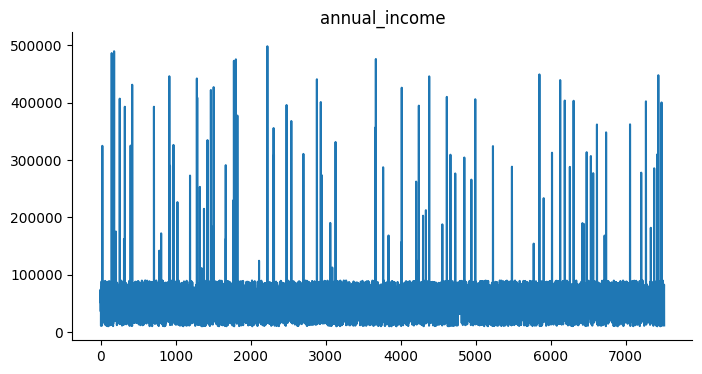

In [91]:
# กราฟแสดงค่าของข้อมูล income ทั้งหมด 7,514 คน
from matplotlib import pyplot as plt
income_df['annual_income'].plot(kind='line', figsize=(8, 4), title='annual_income')
plt.gca().spines[['top', 'right']].set_visible(False)

In [92]:
# เราจะมาเช็คข้อมูลรายได้ของ Miranda Priestly(ssn:987756388) จาก Income เพื่อเพิ่มน้ำหนักของคดีว่าเธอคือผู้ที่ว่าจ้างฆาตกร Jeremy Bowers
income_df[income_df.ssn == 987756388]
# จะเห็นได้ว่า income ของ Miranda Priestly = 310,000 ซึ่งถือว่าอยู่ในระดับที่จะบอกได้ว่าเธอมีเงินมากมายได้

,ssn,annual_income
7422,987756388,310000


# คดีฆาตรกรรม murder ที่เกิดขึ้นในวันที่ 15 มกราคม 2018 ที่เมือง SQL City ฆาตกรตัวจริงก็คือ **Jeremy Bowers** ที่ถูกว่าจ้างโดย **Miranda Priestly**